In [121]:
# %matplotlib inline
%config InlineBackend.figure_format = "retina"

In [122]:
import warnings
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

# feel free to modify, for example, change the context to "notebook"
sns.set_theme(context="talk", style="whitegrid",
              palette="colorblind", color_codes=True,
              rc={"figure.figsize": [15, 6]})

In [124]:
import pandas as pd
import numpy as np
from functools import reduce
import yfinance as yf
import datetime
import datetime as dt
import random
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
mpl.style.use('dark_background')
figsize = (15, 6)

In [125]:
start=dt.datetime(2021,10,5)
end = dt.datetime.now()
tickers = ["^DJI", "^IXIC", "^GSPC", "^STOXX50E", "^N225", "^GDAXI"]
asset_universe = pd.DataFrame([yf.download(ticker, start, end).loc[:, 'Adj Close'] for ticker in tickers],
                     index=tickers).T.fillna(method='ffill')
asset_universe = asset_universe/asset_universe.iloc[0, :]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [126]:
asset_universe

^DJI     ^IXIC     ^GSPC  ^STOXX50E     ^N225    ^GDAXI
Date                                                                   
2021-10-05  1.000000  1.000000  1.000000   1.000000  1.000000  1.000000
2021-10-06  1.002982  1.004717  1.004103   0.987017  0.989460  0.985445
2021-10-07  1.012830  1.015255  1.012435   1.008095  0.994828  1.003710
2021-10-08  1.012577  1.010095  1.010498   1.001933  1.008153  1.000766
2021-10-11  1.005286  1.003628  1.003560   1.001744  1.024300  1.000306
...              ...       ...       ...        ...       ...       ...
2023-09-28  0.981106  0.914607  0.989410   1.023646  1.145582  1.008491
2023-09-29  0.976477  0.915857  0.986729   1.026868  1.145046  1.012642
2023-10-02  0.974317  0.921985  0.986808   1.017759  1.141533  1.003470
2023-10-03  0.961757  0.904782  0.973245   1.007419  1.122774  0.992808
2023-10-04  0.965463  0.917013  0.981138   1.008467  1.097216  0.993776

[522 rows x 6 columns]

In [127]:
import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode
import plotly.express as px
import pandas_bokeh
cf.go_offline()
pandas_bokeh.output_notebook()

Loading BokehJS ...

In [128]:
asset_universe.iplot()

In [129]:
fig_price=px.line(asset_universe, title='Price of individual Indexes')
fig_price.show()

<Axes: xlabel='Date'>

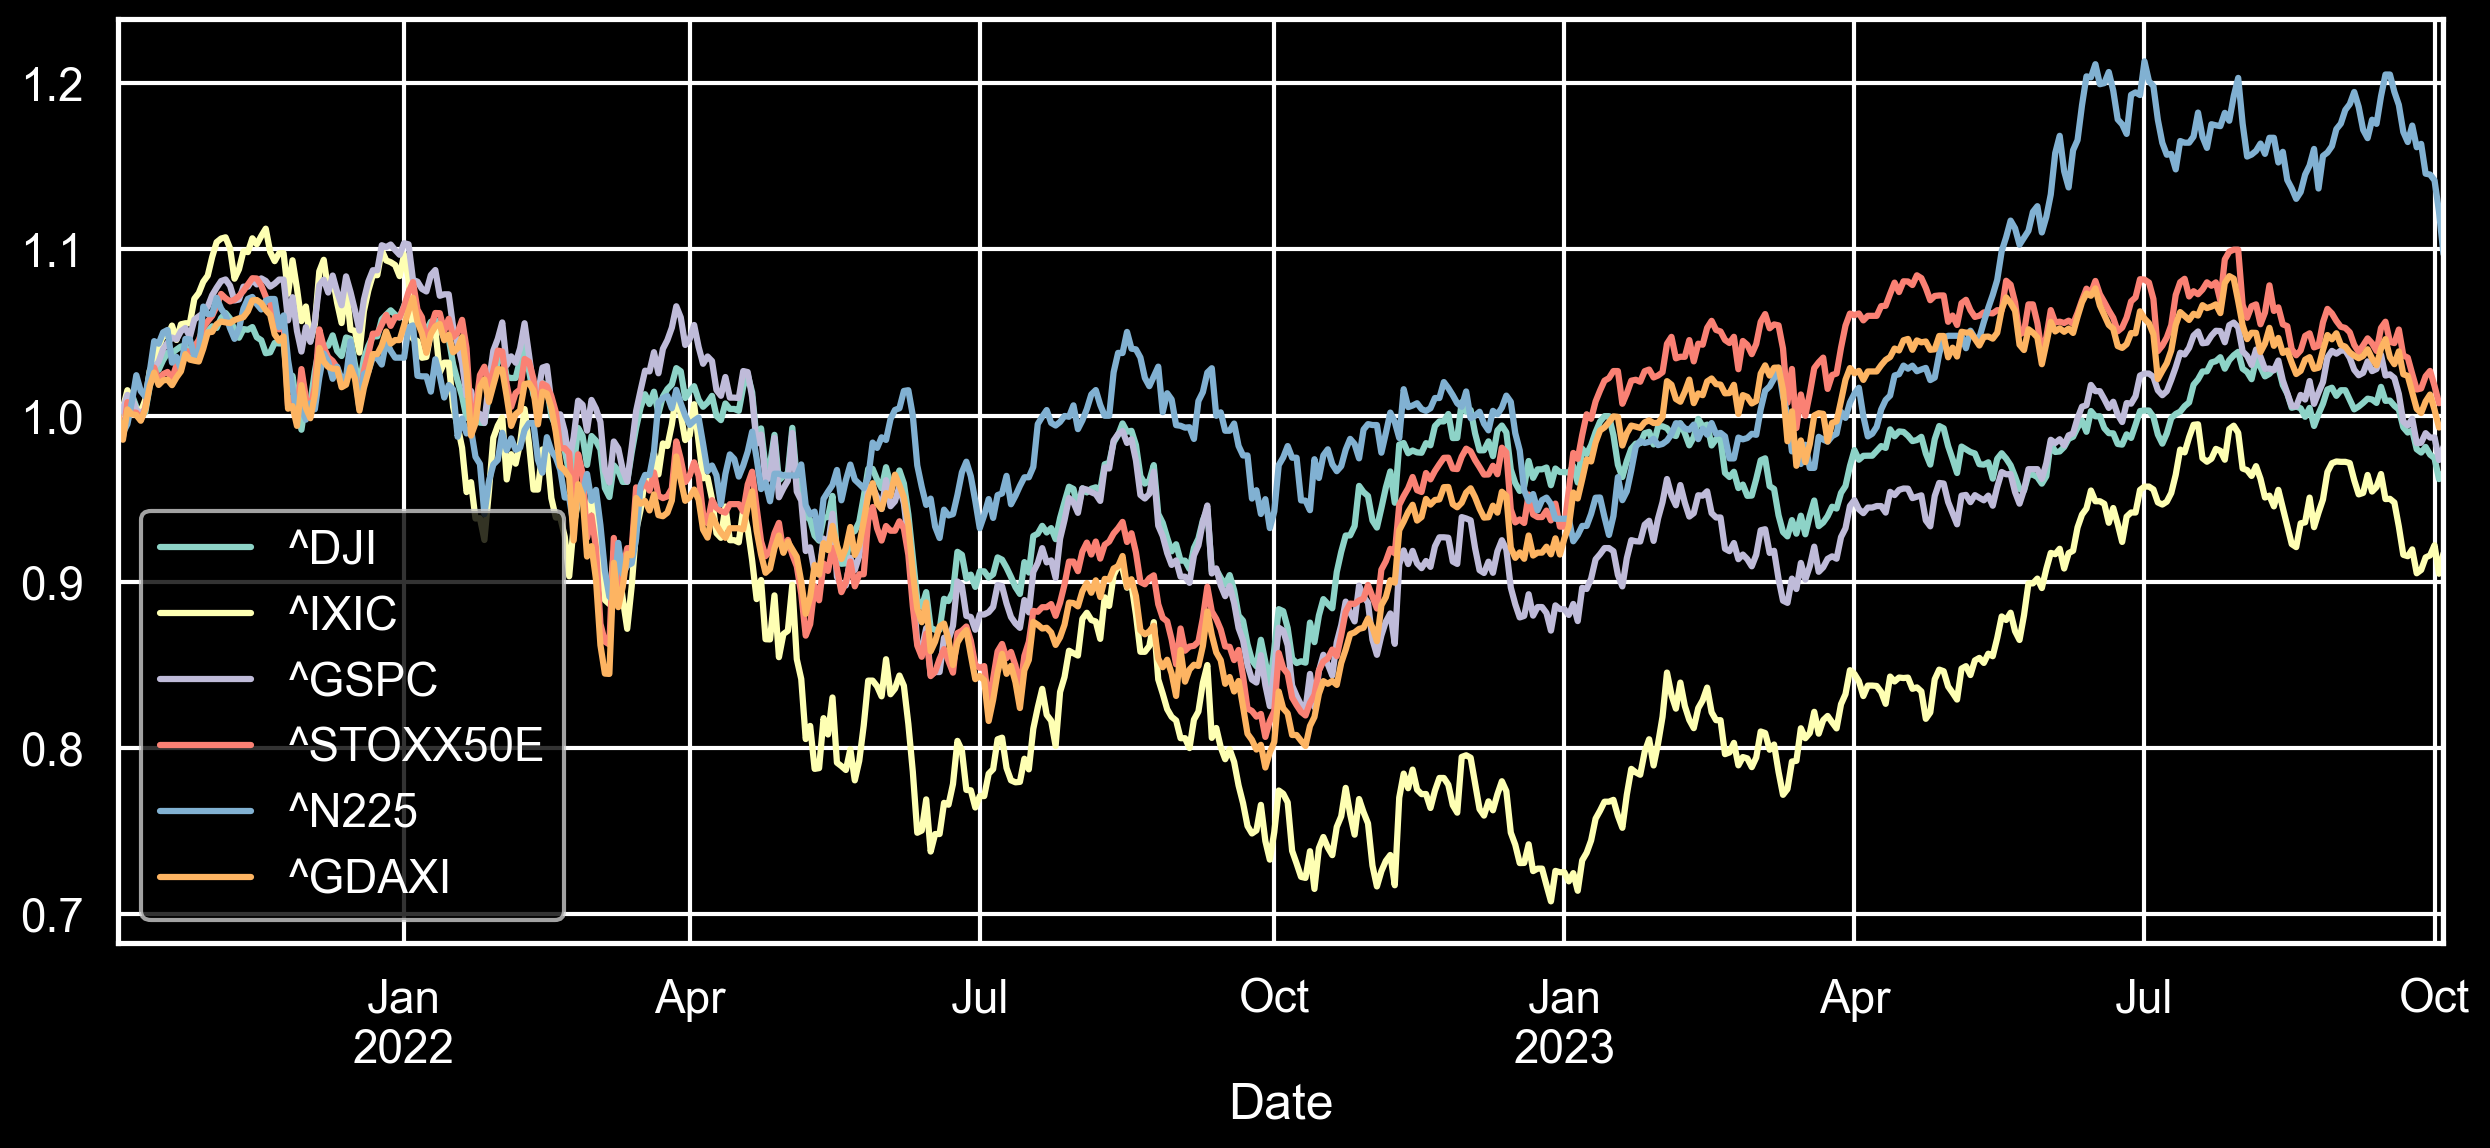

In [130]:
asset_universe.plot(figsize=figsize)

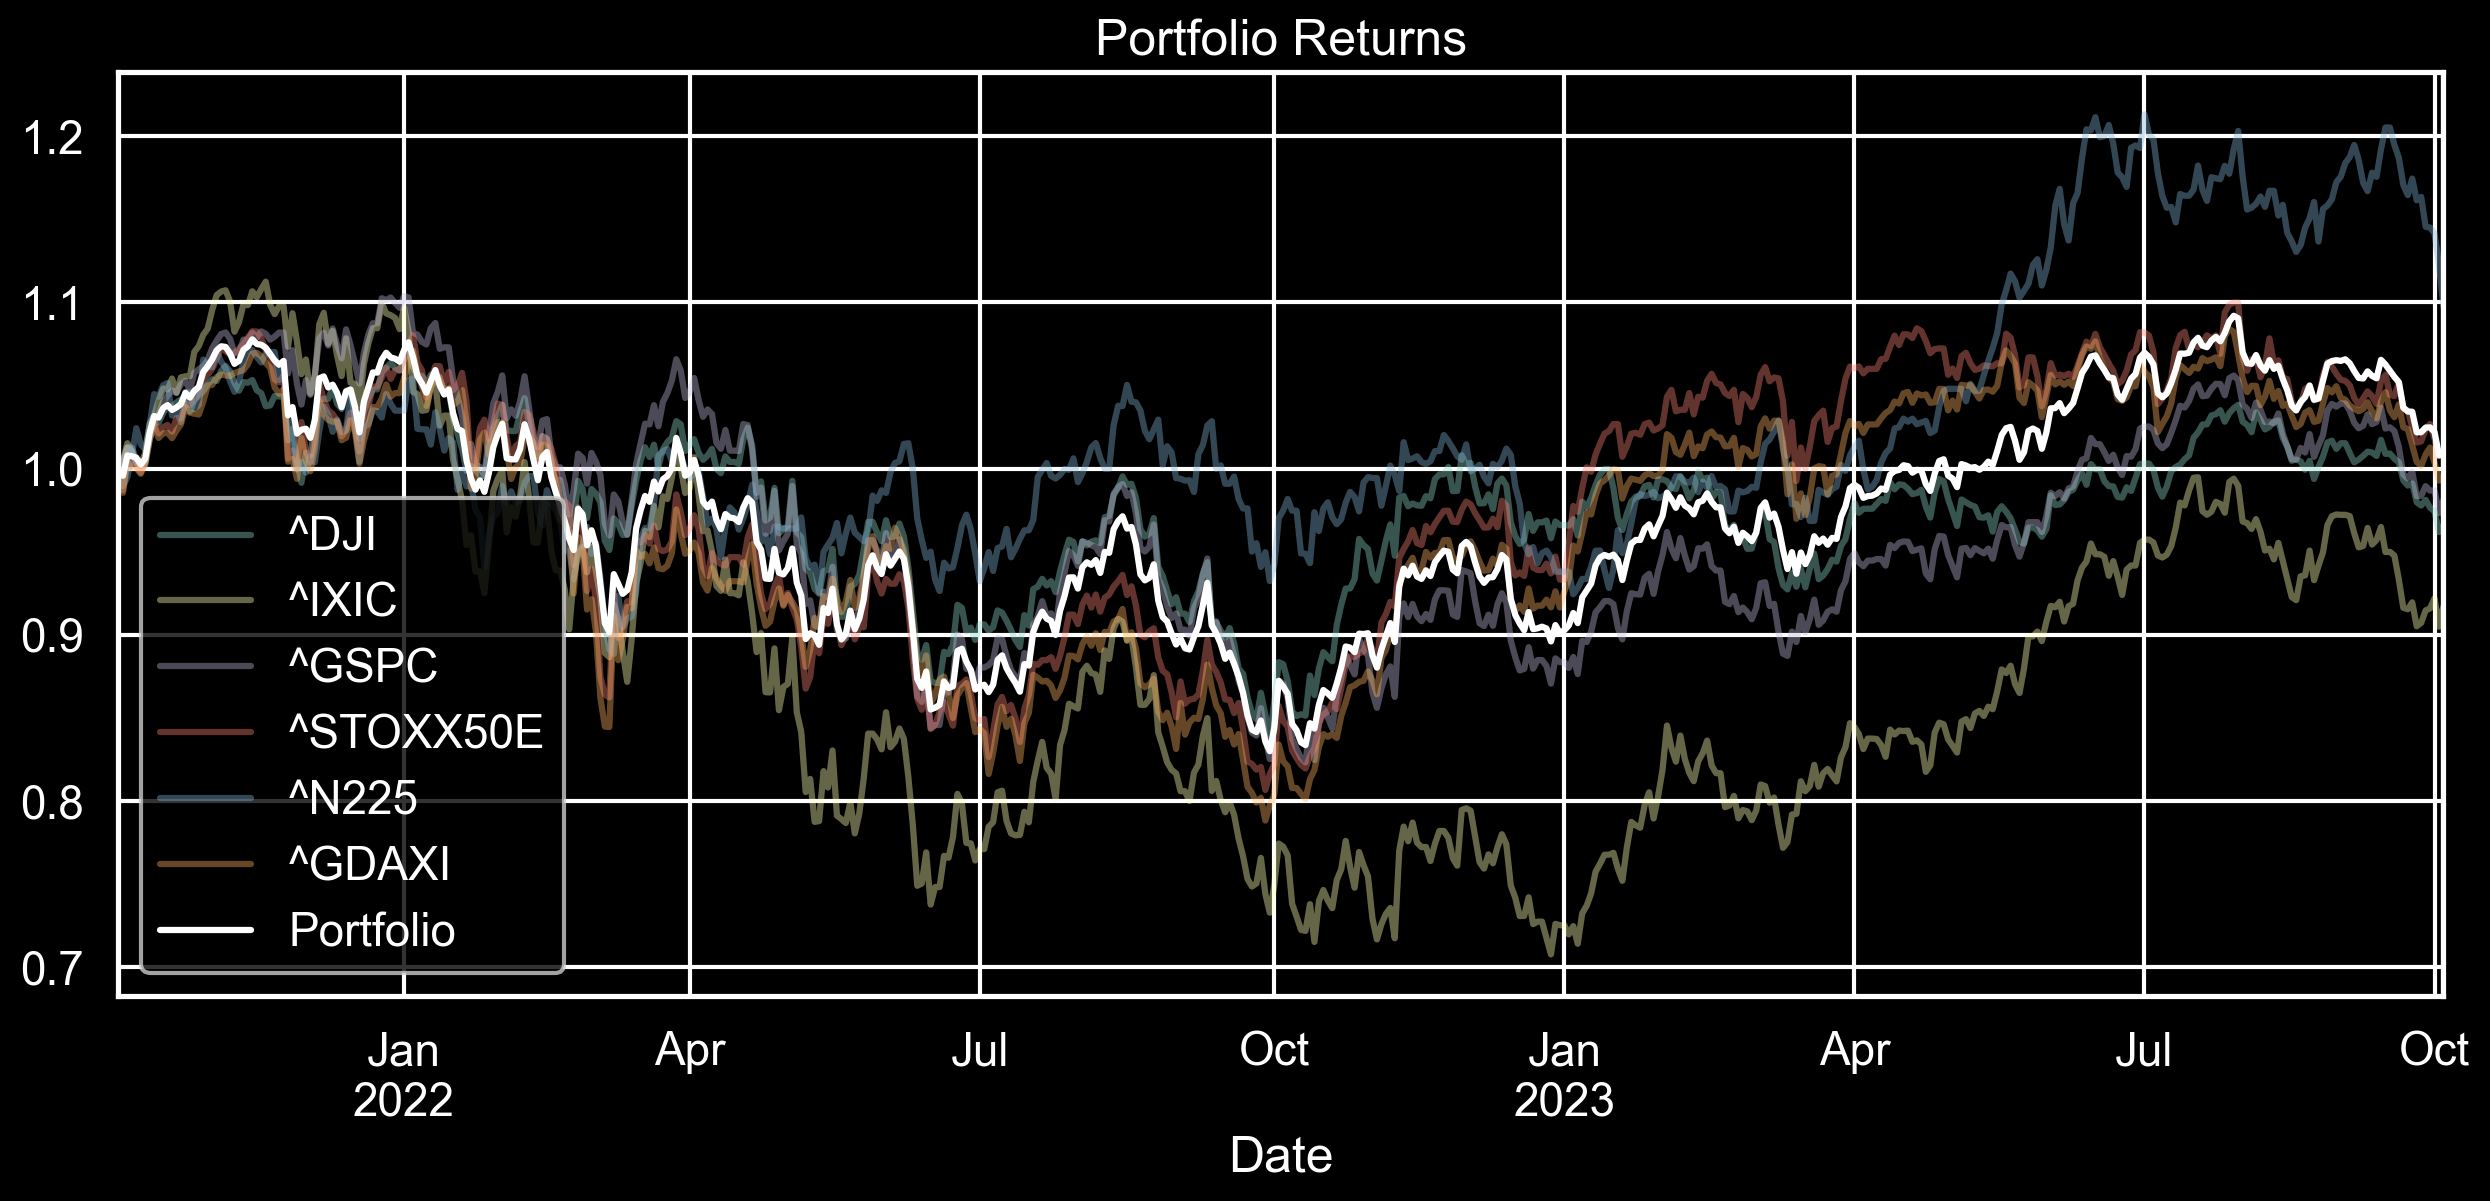

In [143]:
portfolio_returns = asset_universe.pct_change().dropna().mean(axis=1)
portfolio = (asset_universe.pct_change().dropna().mean(axis=1) + 1).cumprod()
asset_universe.plot(figsize=figsize, alpha=0.4)
portfolio.plot(label='Portfolio', color='white')
plt.title('Portfolio Returns')
plt.legend()
plt.show()

<Axes: >

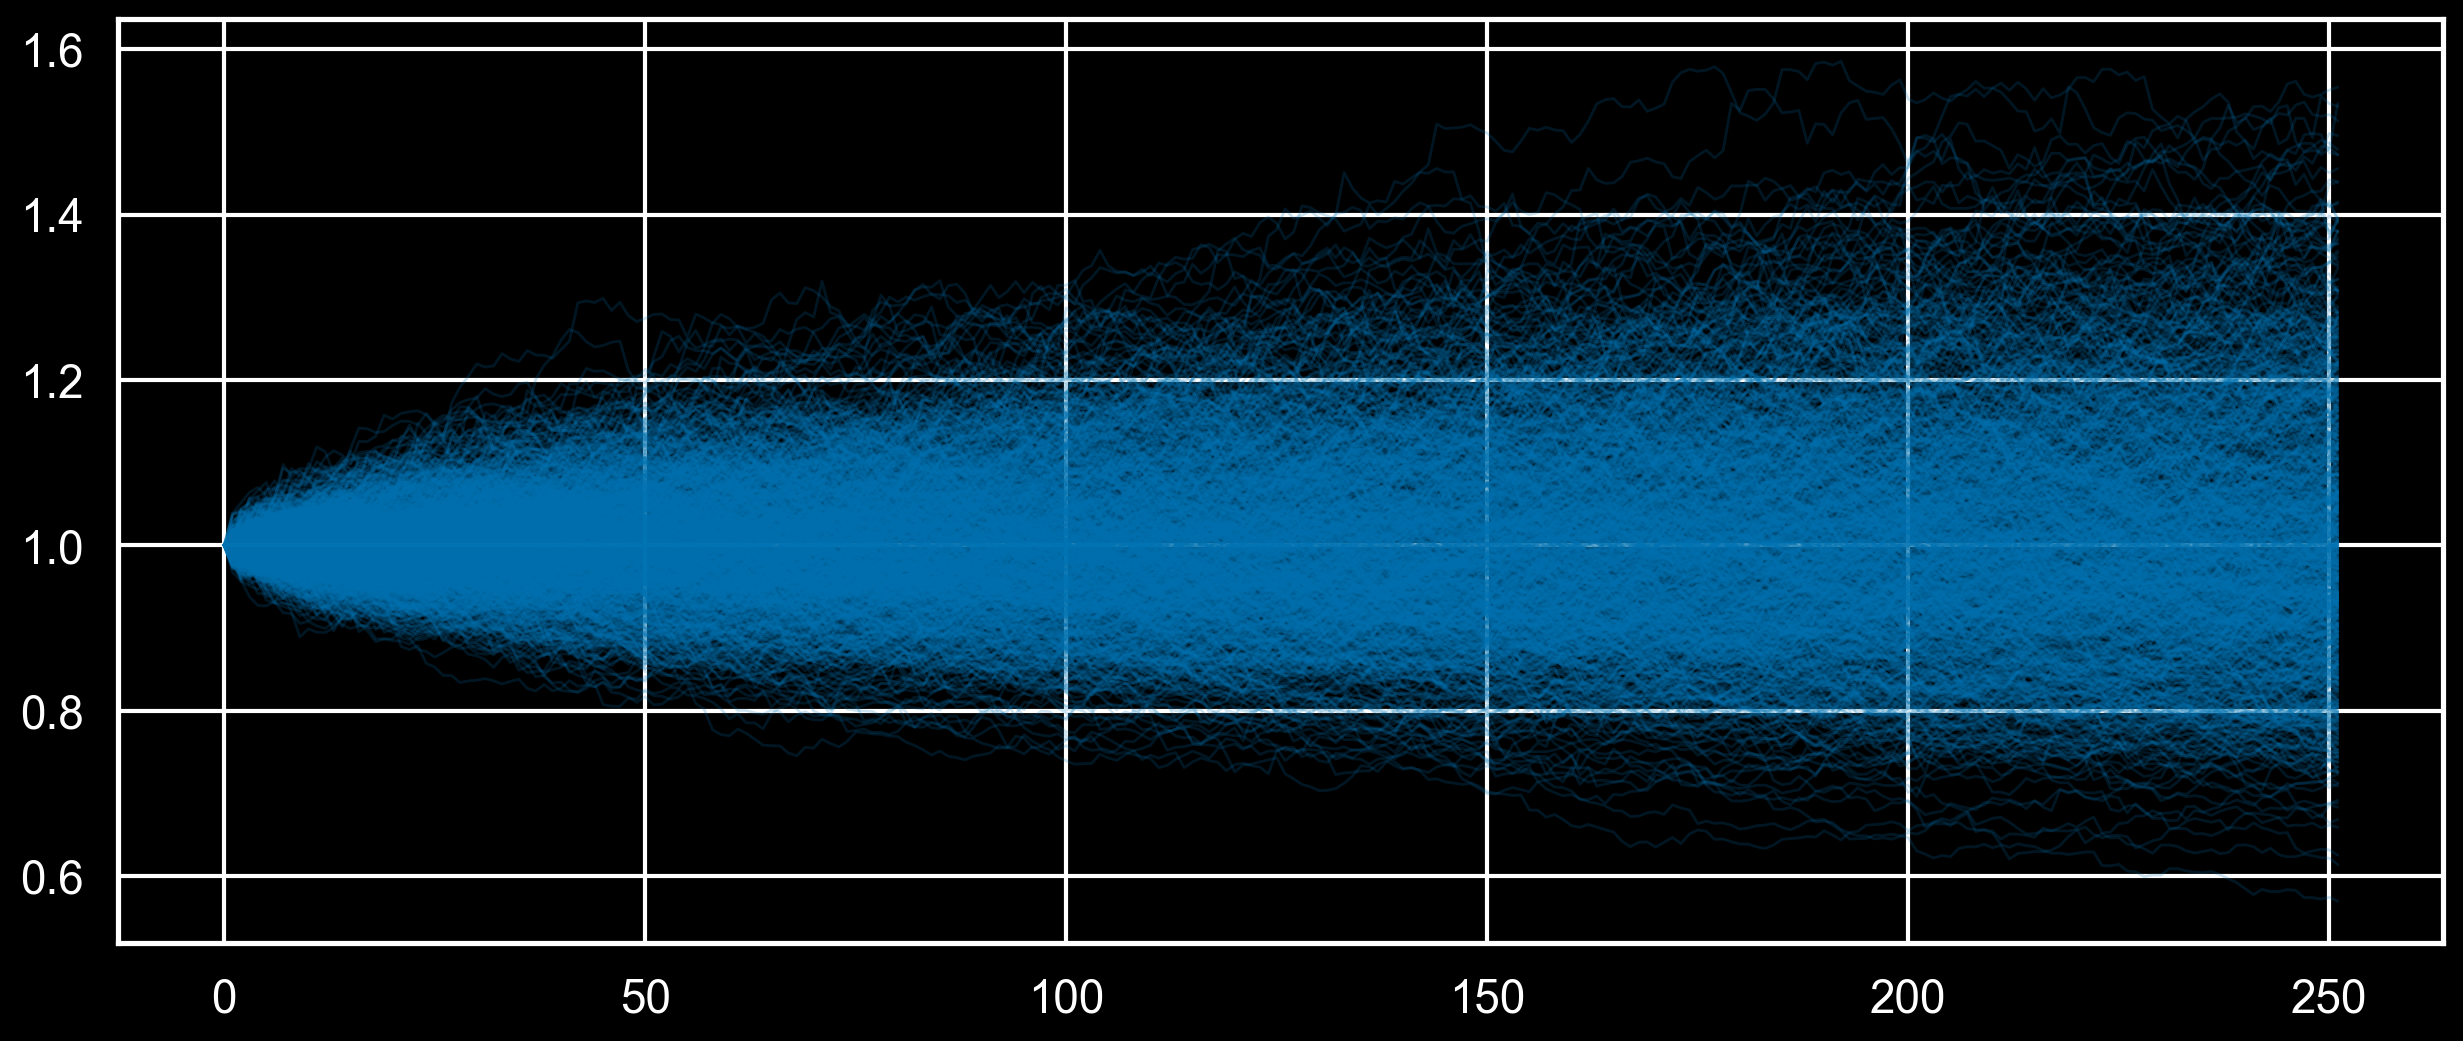

In [132]:
portfolio_bootstrapping = (1+pd.DataFrame([random.choices(list(
    portfolio_returns.values), k=252) for i in 
    range(1000)]).T.shift(1).fillna(0)).cumprod()
portfolio_bootstrapping.plot(figsize=figsize, legend=False, linewidth=1, alpha=0.2, color='b')

<Axes: >

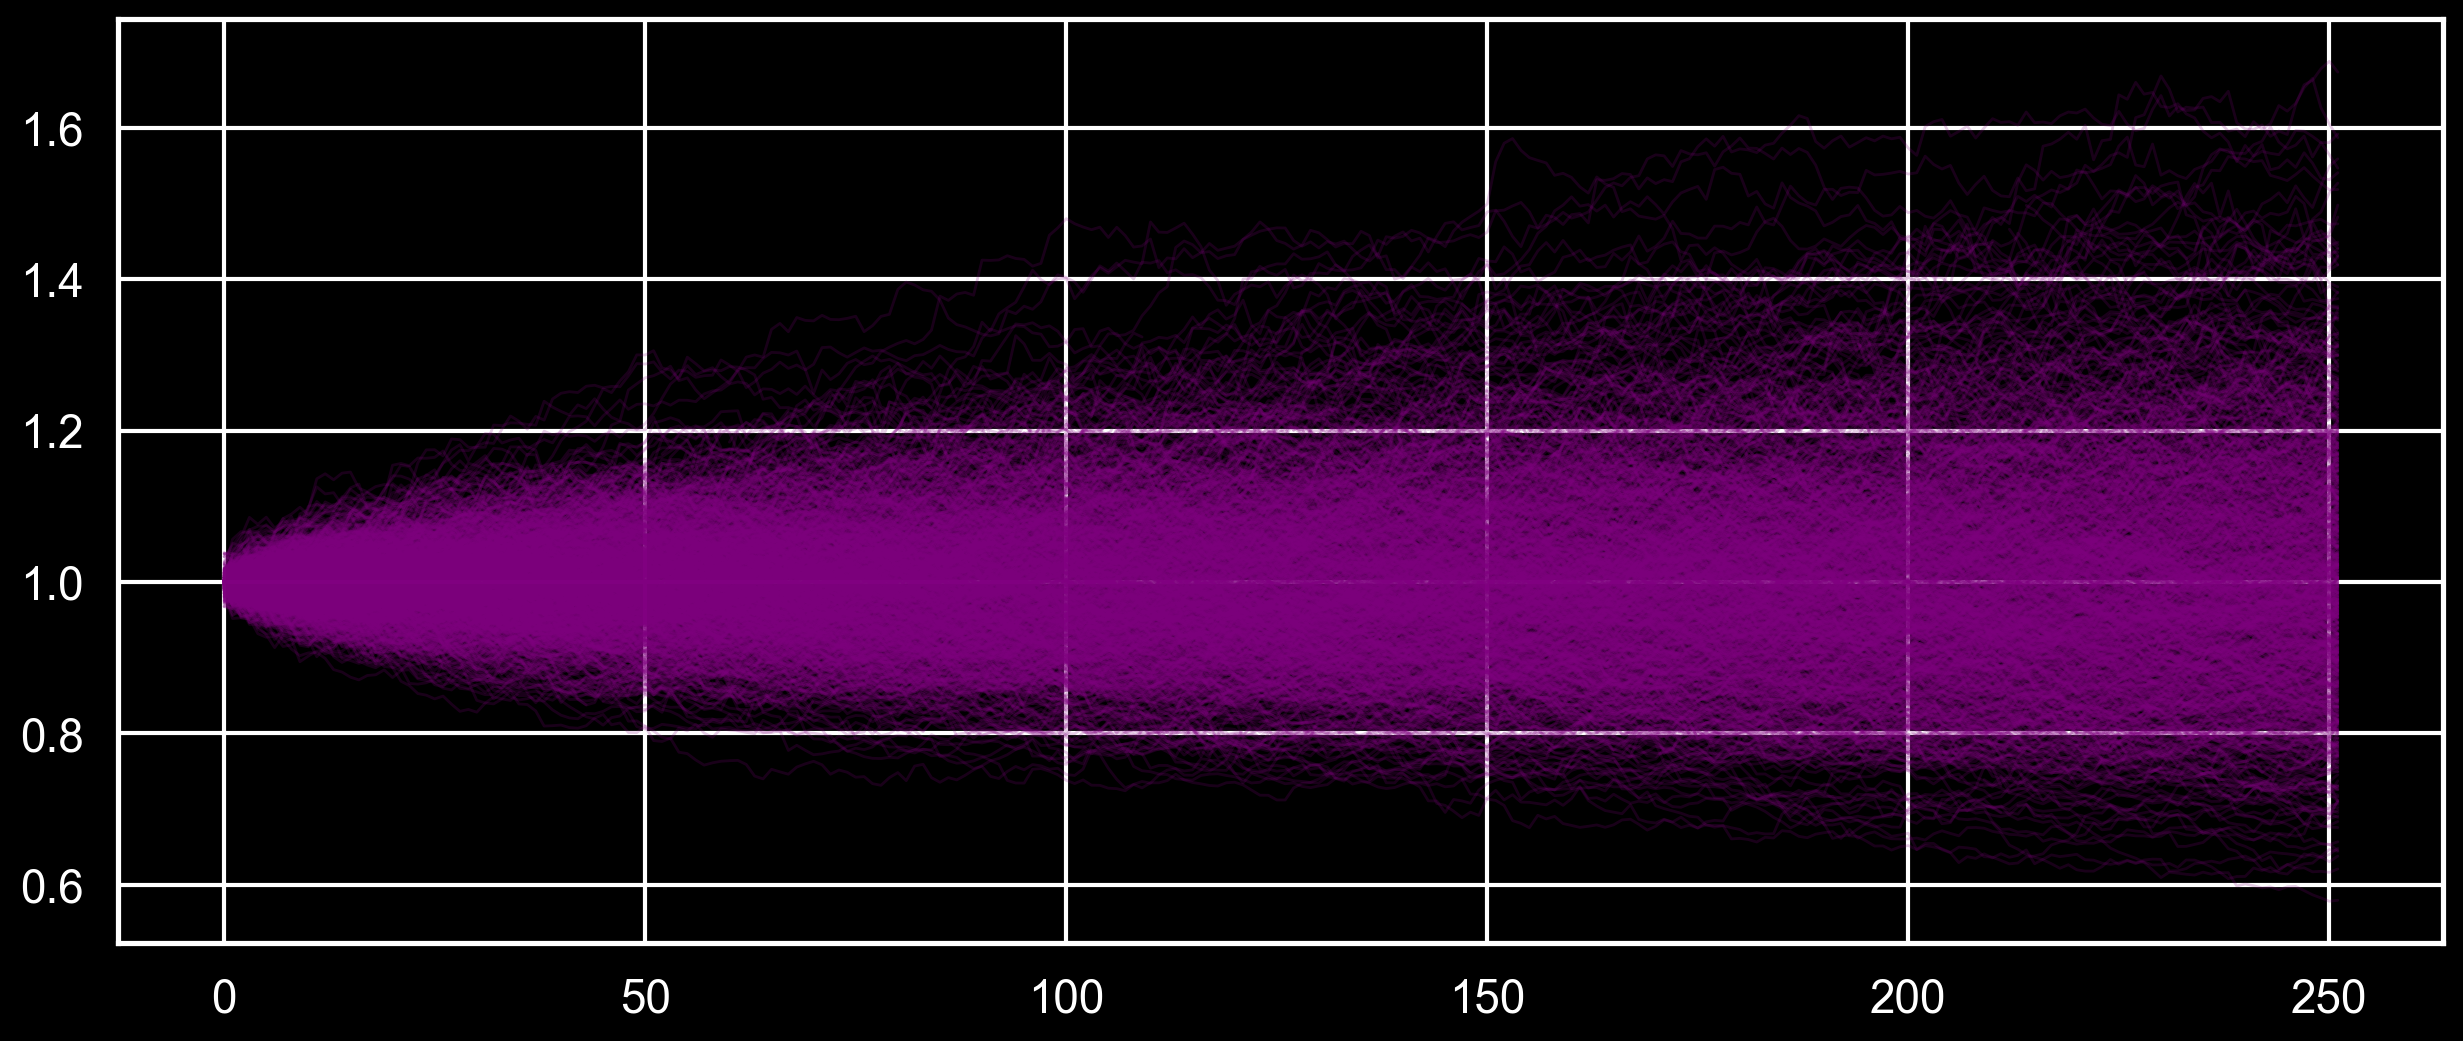

In [133]:
asset_universe_returns = asset_universe.pct_change()
portfolio_constituents_bootstrapping = pd.DataFrame([((asset_universe_returns.iloc[random.choices(range(len(asset_universe)), k=252)]).mean(axis=1)+1).cumprod().values 
    for x in range(1000)]).T
portfolio_constituents_bootstrapping.plot(figsize=figsize, legend=False, linewidth=1, alpha=0.2, color='purple')

In [134]:
mu = portfolio_returns.mean()
sigma = portfolio_returns.std()

print(f'Our portfolio mean return value is {round(mu*100,2)}%')
print(f'Our portfolio standard deviation value is {round(sigma*100,2)}%')

Our portfolio mean return value is 0.01%
Our portfolio standard deviation value is 0.96%


<Axes: >

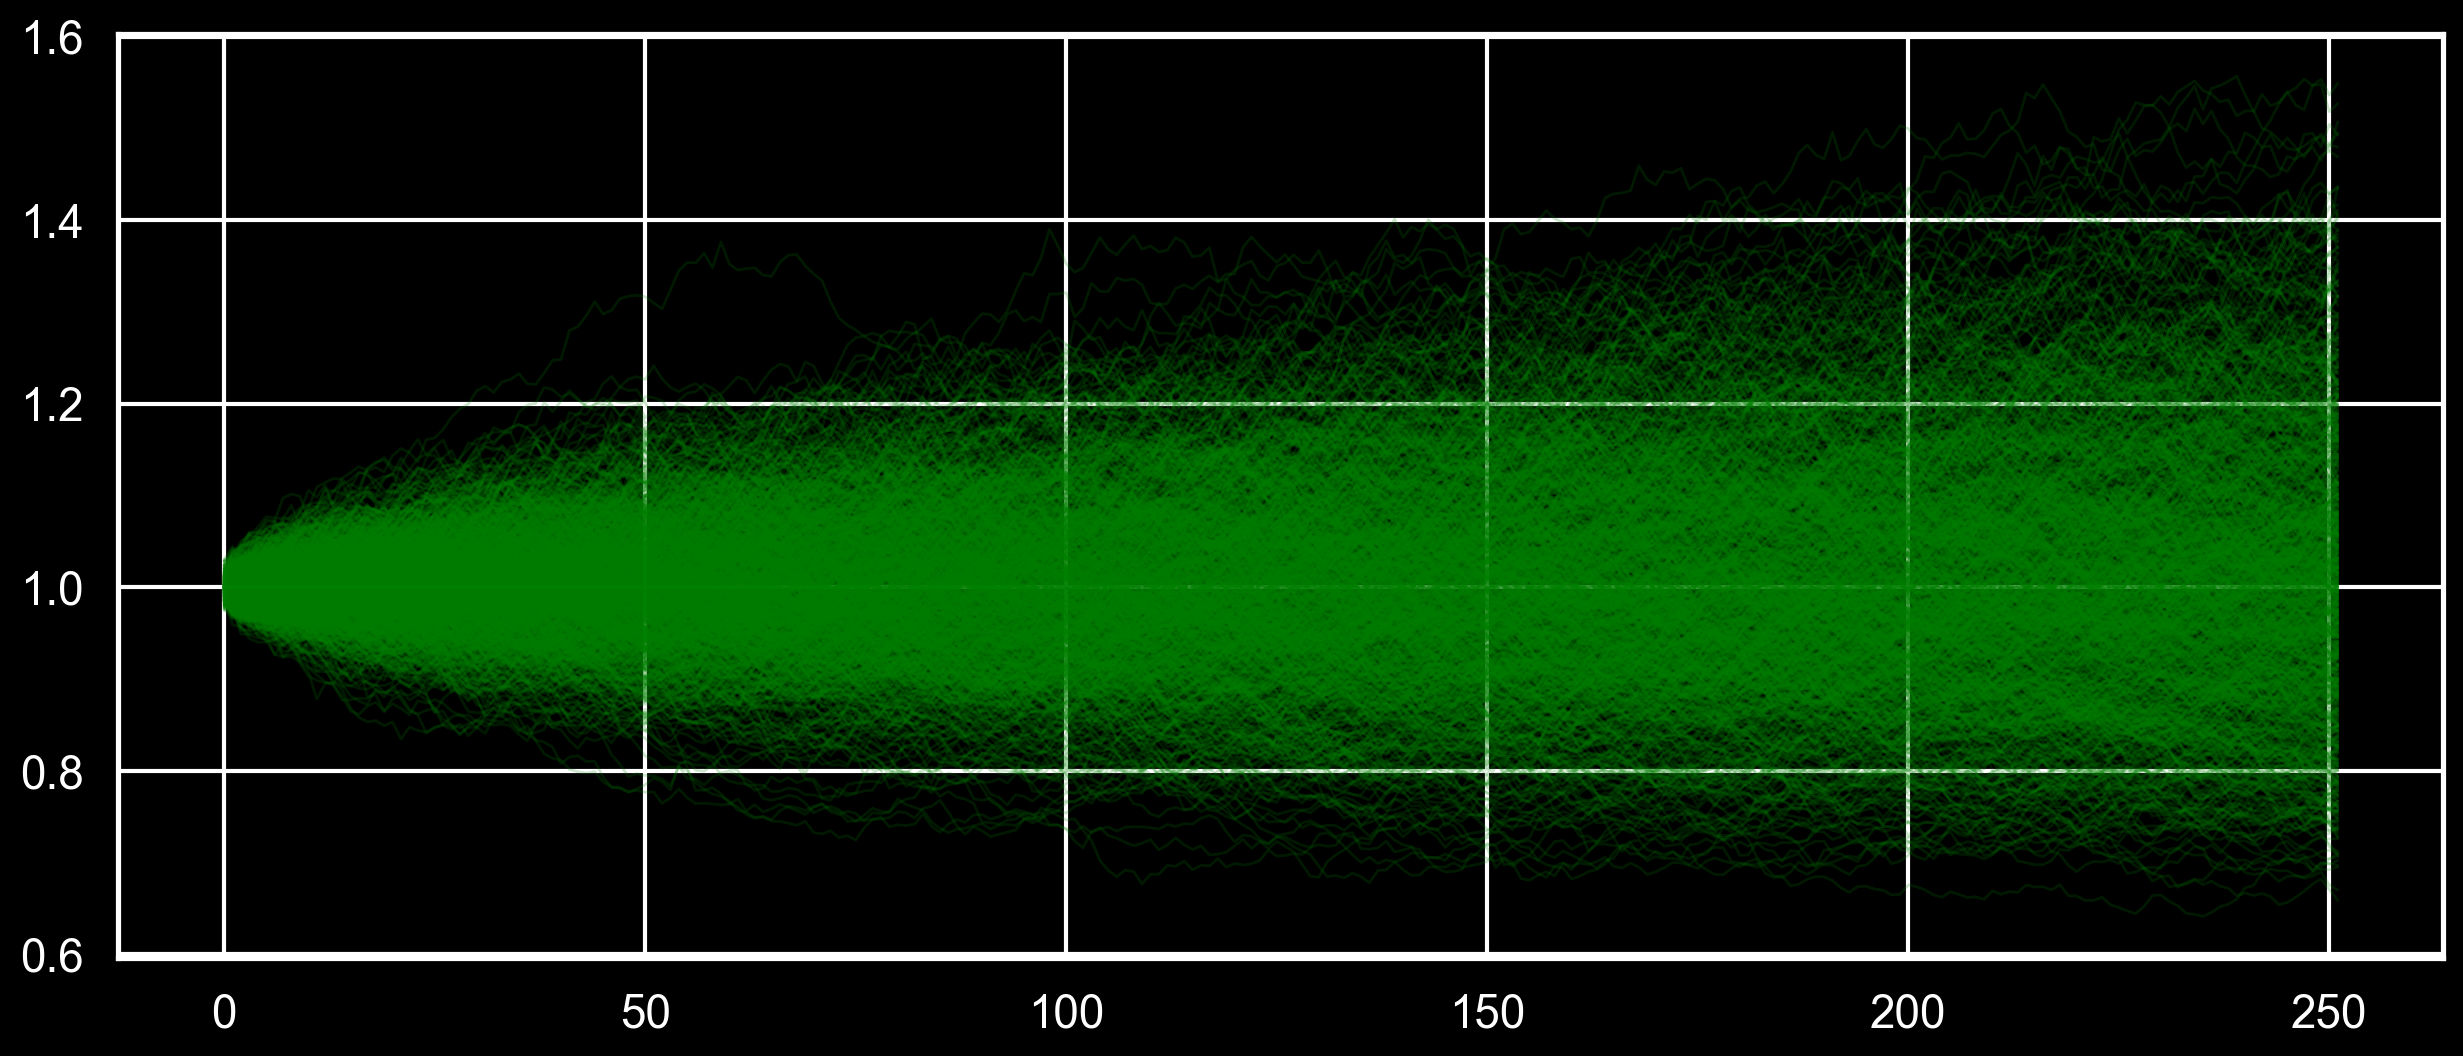

In [135]:
portfolio_mc = pd.DataFrame([(np.random.normal(loc=mu, scale=sigma, size=252)+1) for x in range(1000)]).T.cumprod()
portfolio_mc.plot(figsize=figsize, legend=False, linewidth=1, alpha=0.2, color='green')

In [136]:
for asset in (asset_universe_returns.mean() * 100).round(2).index:
    print(f'The mean return for {asset} is {(asset_universe_returns.mean() * 100).round(2)[asset]}%')
    
print('\n')
for asset in (asset_universe_returns.std() * 100).round(2).index:
    print(f'The standard deviation for {asset} is {(asset_universe_returns.std() * 100).round(2)[asset]}%')

The mean return for ^DJI is -0.0%
The mean return for ^IXIC is -0.0%
The mean return for ^GSPC is 0.0%
The mean return for ^STOXX50E is 0.01%
The mean return for ^N225 is 0.02%
The mean return for ^GDAXI is 0.01%


The standard deviation for ^DJI is 1.01%
The standard deviation for ^IXIC is 1.61%
The standard deviation for ^GSPC is 1.21%
The standard deviation for ^STOXX50E is 1.25%
The standard deviation for ^N225 is 1.12%
The standard deviation for ^GDAXI is 1.21%


In [137]:
asset_returns_dfs = []
for asset in asset_universe_returns.mean().index:
    mu = asset_universe_returns.mean()[asset]
    sigma = asset_universe_returns.std()[asset]
    asset_mc_rets = pd.DataFrame([(np.random.normal(loc=mu, 
                    scale=sigma, size=252)) for x in range(1000)]).T
    
    asset_returns_dfs.append(asset_mc_rets)

In [138]:
weighted_asset_returns_dfs = [(returns_df / len(tickers)) for returns_df in asset_returns_dfs]

In [139]:
portfolio_constituents_mc = (reduce(lambda x, y: x + y,weighted_asset_returns_dfs) + 1).cumprod()

<Axes: >

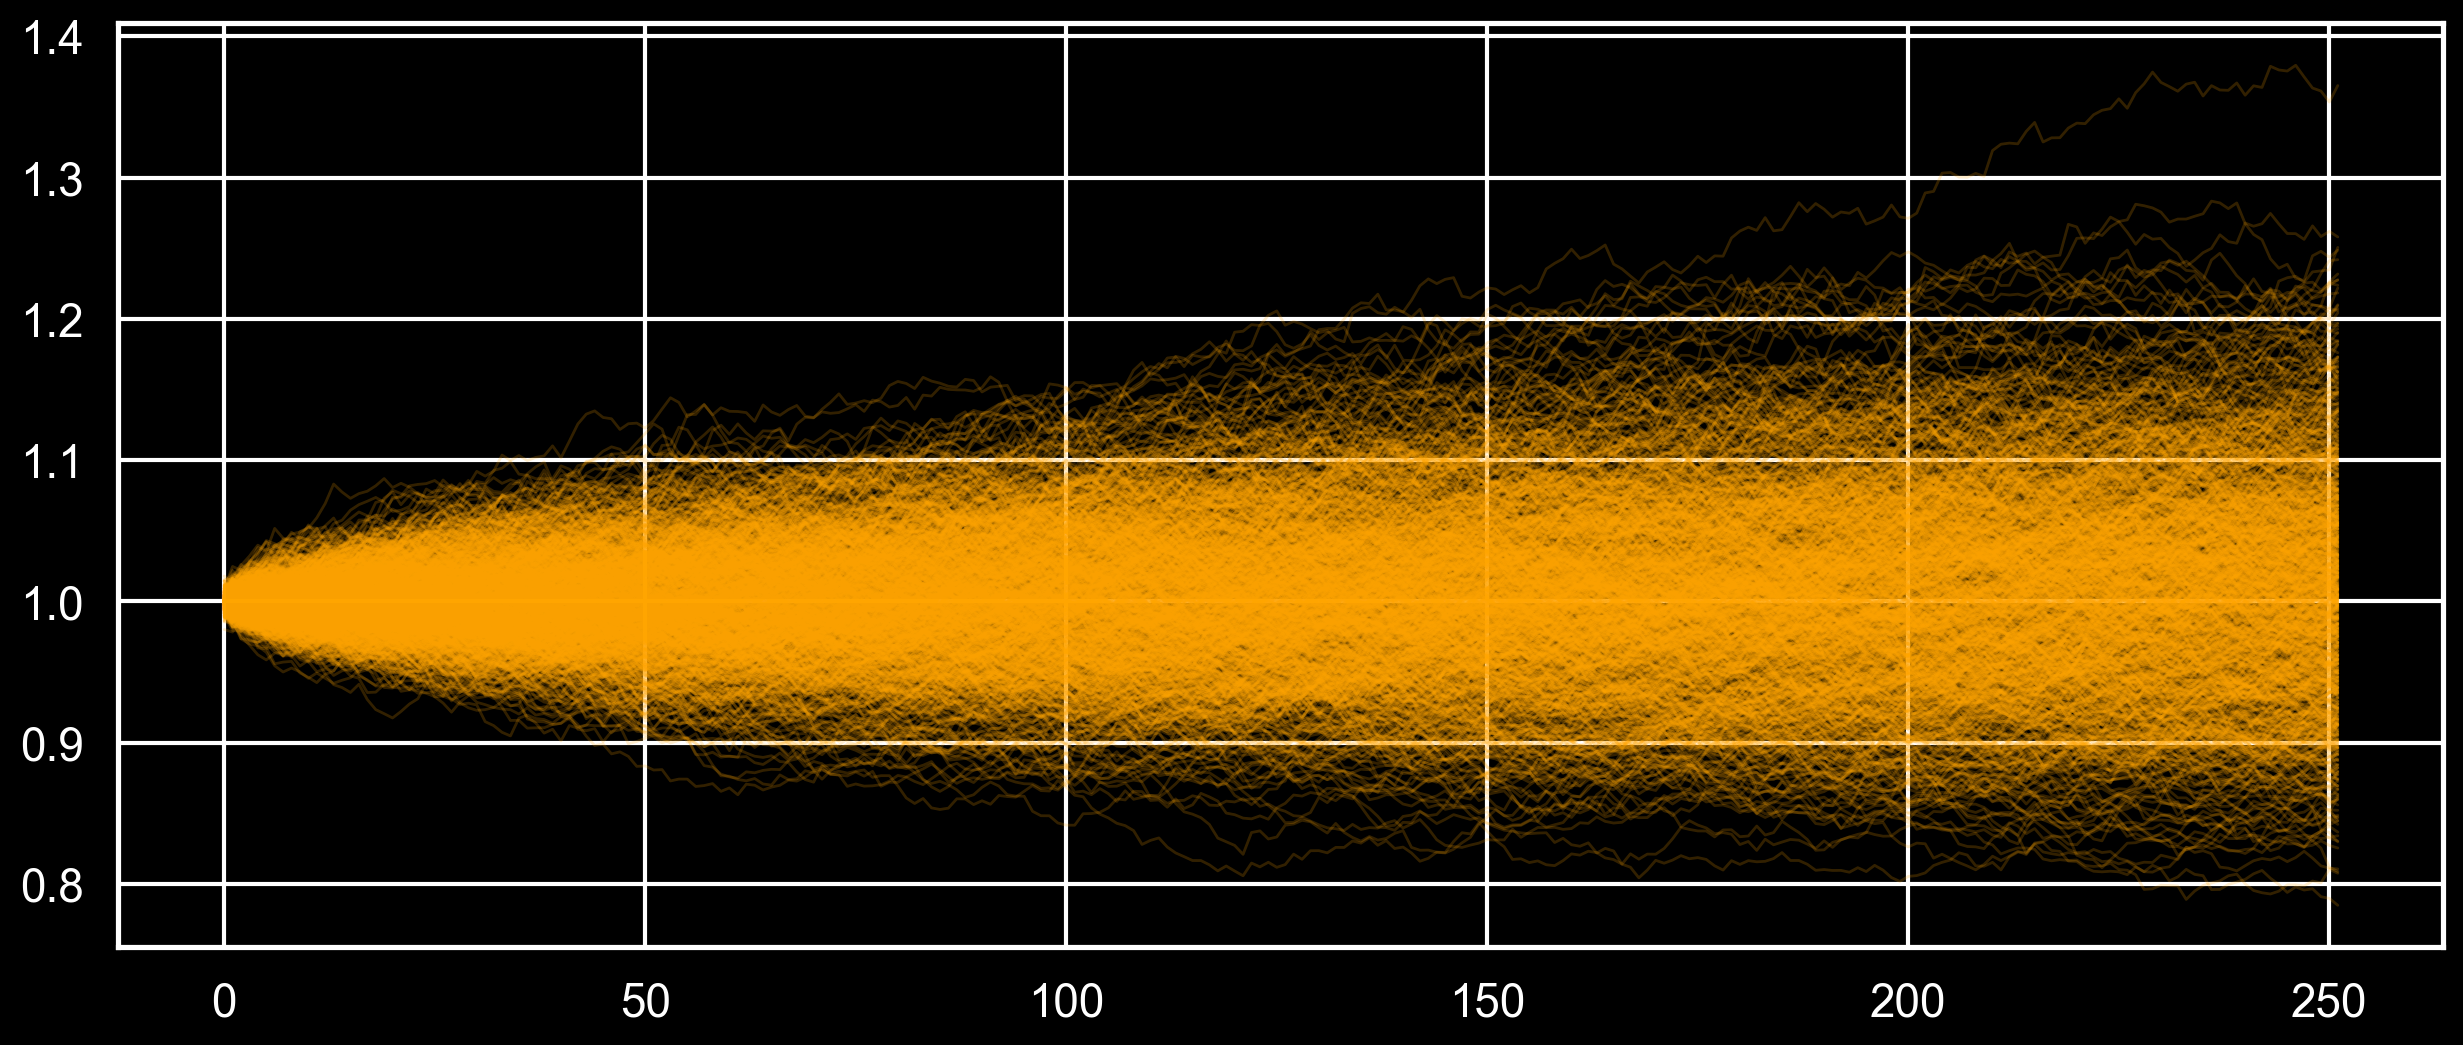

In [140]:
portfolio_constituents_mc.plot(figsize=figsize, legend=False, linewidth=1, alpha=0.2, color='orange')

[]

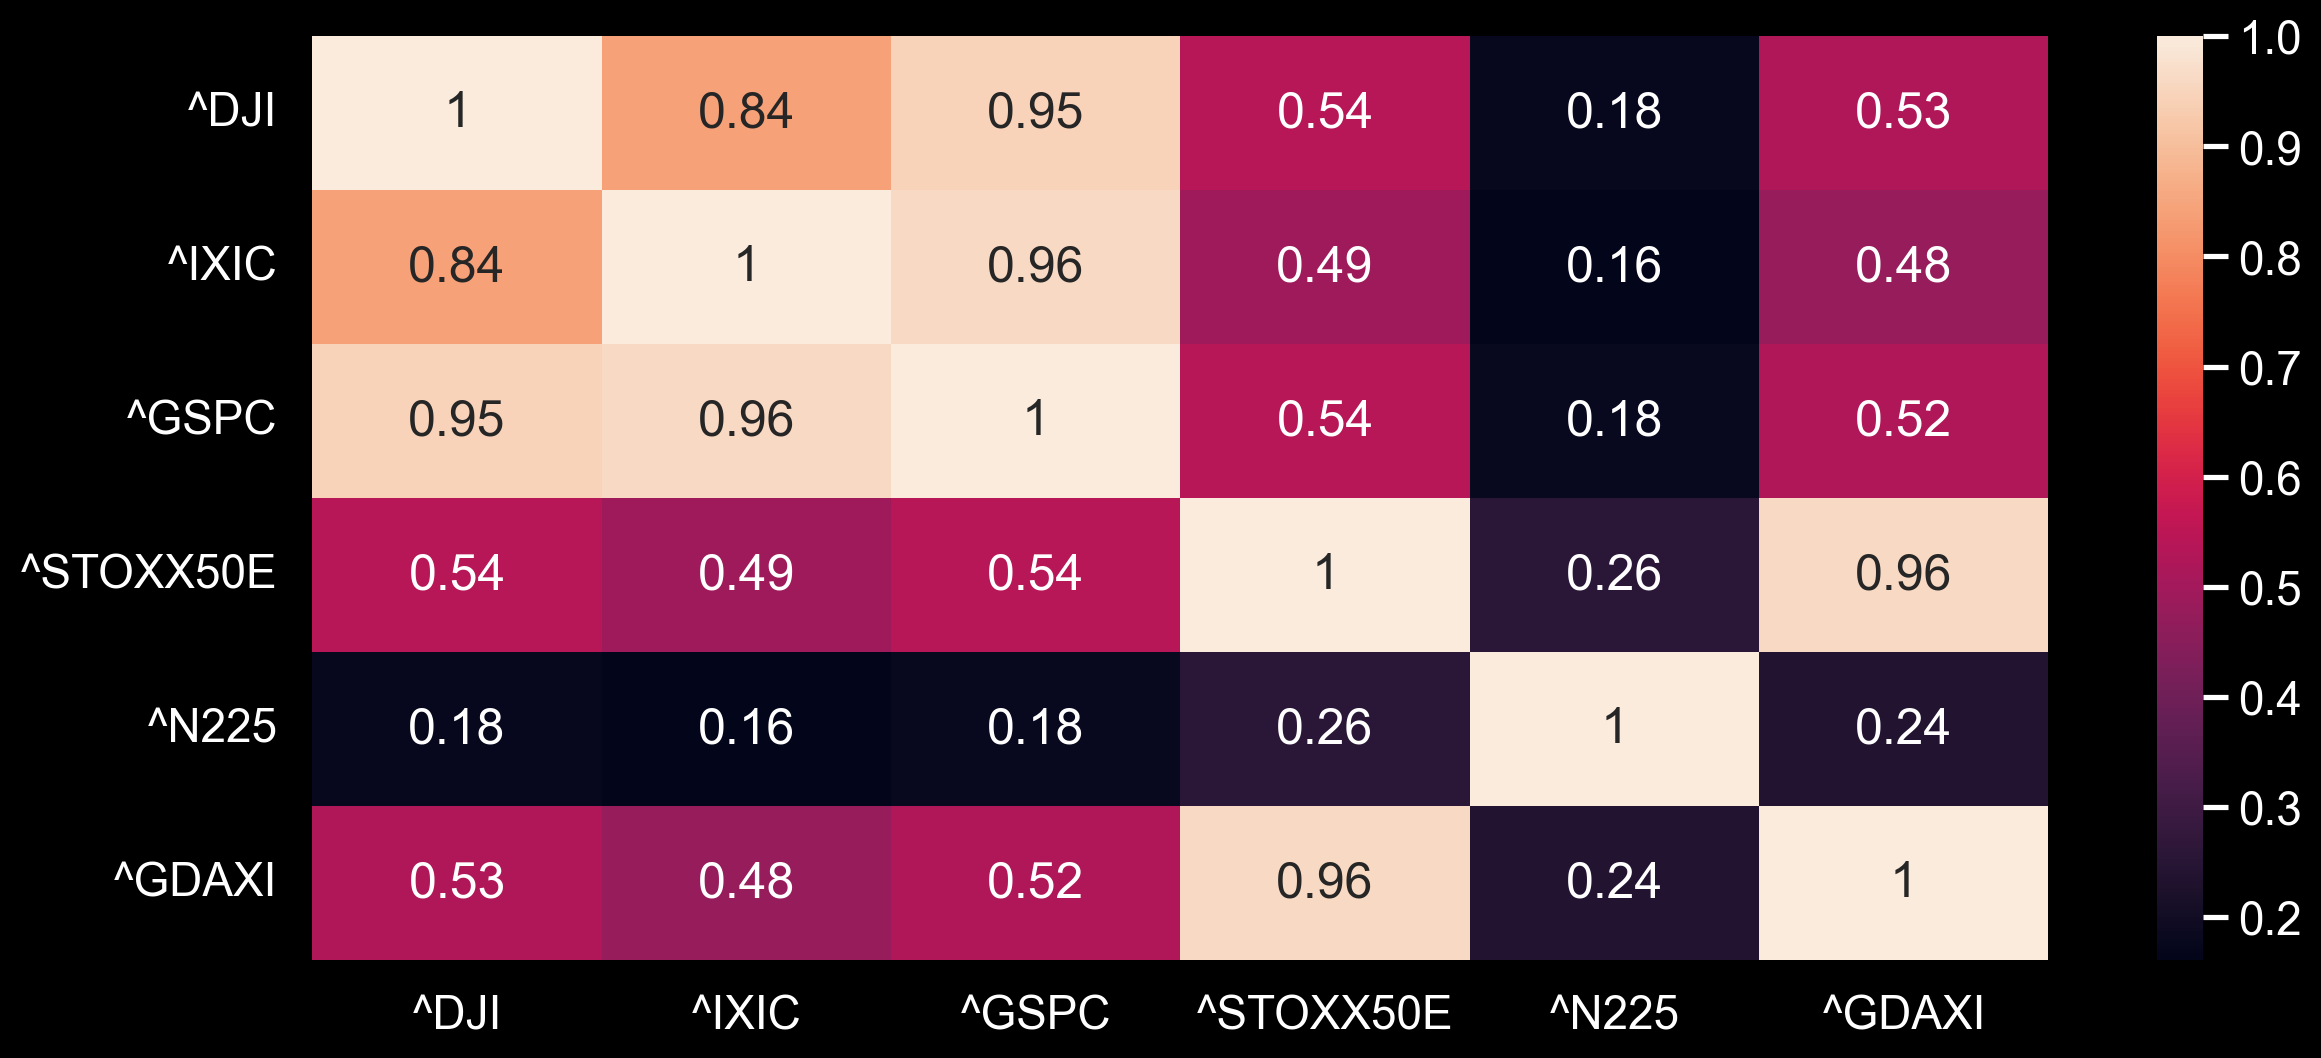

In [141]:
ax, fig = plt.subplots(figsize=(14,6))
sns.heatmap(asset_universe_returns.corr(),annot=True)
plt.plot()